# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
#https://api.openweathermap.org/data/2.5/weather?lat=57&lon=-2.15&appid={API key}&units=imperial
url = f"https://api.openweathermap.org/data/2.5/weather?units=imperial&"

# Define an empty list to fetch the weather data for each city
city_data = []

        # Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_name = city_weather["name"]
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city_name, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        #IndexList.append(i)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | north bend
Processing Record 3 of Set 1 | gizo
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | jumla
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | beringovskiy
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | lasa
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | san quintin
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | souillac
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | tabou
Processing Record 16 of Set 1 | amga
Processing Record 17 of Set 1 | podgornoye
Processing Record 18 of Set 1 | port shepstone
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | victoria
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | hilo
Processing Record 23 of Set 1 | ola
Processing Rec

Processing Record 38 of Set 4 | faya
Processing Record 39 of Set 4 | emba
Processing Record 40 of Set 4 | college
Processing Record 41 of Set 4 | narsaq
Processing Record 42 of Set 4 | mayumba
Processing Record 43 of Set 4 | krynychky
Processing Record 44 of Set 4 | asau
Processing Record 45 of Set 4 | arraial do cabo
Processing Record 46 of Set 4 | inongo
Processing Record 47 of Set 4 | thompson
Processing Record 48 of Set 4 | alice springs
Processing Record 49 of Set 4 | torbay
Processing Record 0 of Set 5 | emerald
Processing Record 1 of Set 5 | severo-kurilsk
Processing Record 2 of Set 5 | dvinskoy
Processing Record 3 of Set 5 | mutoko
Processing Record 4 of Set 5 | hasaki
Processing Record 5 of Set 5 | chuy
Processing Record 6 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 7 of Set 5 | souris
Processing Record 8 of Set 5 | kjollefjord
Processing Record 9 of Set 5 | ambon
Processing Record 10 of Set 5 | mouzakion
City not found. Skipping...
Processing Record 1

Processing Record 28 of Set 8 | kodinsk
Processing Record 29 of Set 8 | raipur
Processing Record 30 of Set 8 | ledyard
Processing Record 31 of Set 8 | maragogi
Processing Record 32 of Set 8 | sao jose da coroa grande
Processing Record 33 of Set 8 | vardo
Processing Record 34 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 35 of Set 8 | oranjemund
Processing Record 36 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 37 of Set 8 | zhigansk
Processing Record 38 of Set 8 | samfya
Processing Record 39 of Set 8 | tromso
Processing Record 40 of Set 8 | san juan
Processing Record 41 of Set 8 | grand gaube
Processing Record 42 of Set 8 | port-gentil
Processing Record 43 of Set 8 | dunedin
Processing Record 44 of Set 8 | madera
Processing Record 45 of Set 8 | kulhudhuffushi
Processing Record 46 of Set 8 | tubuala
Processing Record 47 of Set 8 | idlib
Processing Record 48 of Set 8 | yamada
Processing Record 49 of Set 8 | astana
Processing Record 0

Processing Record 16 of Set 12 | rincon
Processing Record 17 of Set 12 | aksay
Processing Record 18 of Set 12 | skibbereen
Processing Record 19 of Set 12 | piacabucu
Processing Record 20 of Set 12 | tarakan
Processing Record 21 of Set 12 | arlit
Processing Record 22 of Set 12 | valera
Processing Record 23 of Set 12 | nelson
Processing Record 24 of Set 12 | brekstad
Processing Record 25 of Set 12 | mahibadhoo
Processing Record 26 of Set 12 | sobolevo
Processing Record 27 of Set 12 | guangyuan
Processing Record 28 of Set 12 | barabinsk
Processing Record 29 of Set 12 | adilabad
Processing Record 30 of Set 12 | aksu
Processing Record 31 of Set 12 | miyako
Processing Record 32 of Set 12 | nishihara
Processing Record 33 of Set 12 | adrar
Processing Record 34 of Set 12 | hurricane
Processing Record 35 of Set 12 | sivas
Processing Record 36 of Set 12 | sur
Processing Record 37 of Set 12 | pisco
Processing Record 38 of Set 12 | plettenberg bay
Processing Record 39 of Set 12 | melendugno
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)
city_data_df = city_data_df.rename_axis('City ID')

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
0,Rikitea,-23.1203,-134.9692,78.94,80,100,17.29,PF,1674628790
1,North Bend,43.4065,-124.2243,40.06,99,0,0.00,US,1674628864
2,Gizo Government Station,-8.1030,156.8419,82.36,75,100,2.95,SB,1674628864
3,Tuktoyaktuk,69.4541,-133.0374,-4.00,77,100,12.66,CA,1674628865
4,Jumla,29.2747,82.1838,48.88,55,100,4.74,NP,1674628866


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Rikitea,-23.1203,-134.9692,78.94,80,100,17.29,PF,1674628790
1,North Bend,43.4065,-124.2243,40.06,99,0,0.00,US,1674628864
2,Gizo Government Station,-8.1030,156.8419,82.36,75,100,2.95,SB,1674628864
3,Tuktoyaktuk,69.4541,-133.0374,-4.00,77,100,12.66,CA,1674628865
4,Jumla,29.2747,82.1838,48.88,55,100,4.74,NP,1674628866


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

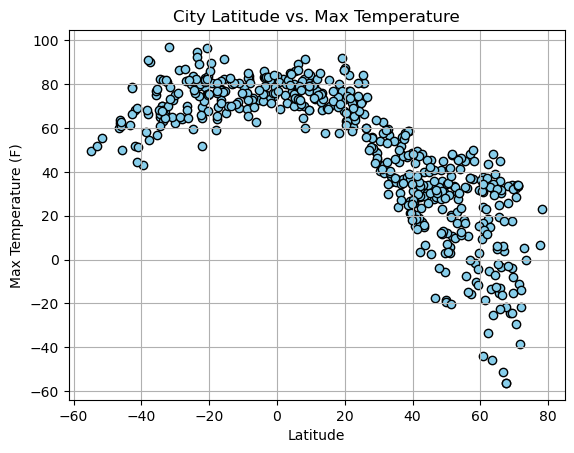

In [8]:
# Build scatter plot for latitude vs. temperature
#plt.scatter(x, y, label = "label_name" )
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",c="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

Latitude vs Temperature Scatter Plot Insights :
The scatter plot maps cities' temperature against their latitude. Cities selected randomly. The arc of the scatter plot shows temperature increasing near the equator (Latitude 0) and dropping off further away. Given the run date of January 2023, the plot shows lower temperatures to the right of the equator due to winter in the northern hemisphere.

#### Latitude Vs. Humidity

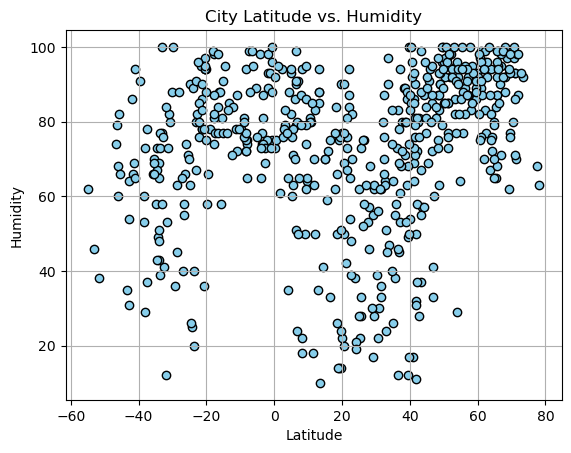

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",c="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

Latitude vs Humidity Scatter Plot Insights:
The scatter plot maps cities' humidity against their latitude. Cities selected randomly.
The result reveals no particular correlation between humidity and latitude.

#### Latitude Vs. Cloudiness

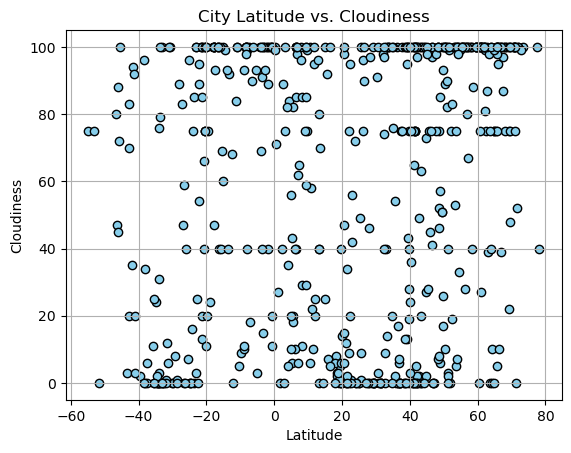

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",c="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

Latitude vs Cloudiness Scatter Plot Insights:
The scatter plot maps cities' cloudiness percent against their latitude. Cities selected randomly.

The result reveals no particular correlation between cloudiness and latitude.

#### Latitude vs. Wind Speed Plot

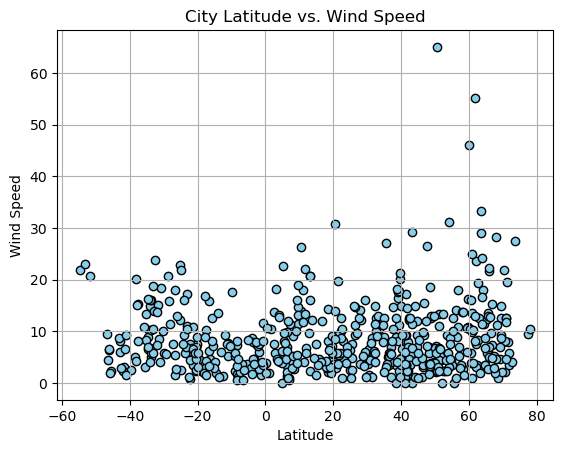

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",c="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

Latitude vs Wind Speed Scatter Plot Insights
The scatter plot maps cities' wind speed against their latitude. Cities selected randomly.

The result reveals no particular correlation between wind speed and latitude.

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    print(line_eq)
    plt.show()
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,North Bend,43.4065,-124.2243,40.06,99,0,0.00,US,1674628864
3,Tuktoyaktuk,69.4541,-133.0374,-4.00,77,100,12.66,CA,1674628865
4,Jumla,29.2747,82.1838,48.88,55,100,4.74,NP,1674628866
5,Barrow,71.2906,-156.7887,-11.18,70,0,19.57,US,1674628866
6,Beringovskiy,63.0500,179.3167,-13.27,94,39,12.64,RU,1674628867


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Rikitea,-23.1203,-134.9692,78.94,80,100,17.29,PF,1674628790
2,Gizo Government Station,-8.1030,156.8419,82.36,75,100,2.95,SB,1674628864
7,Lebu,-37.6167,-73.6500,54.32,78,6,15.32,CL,1674628867
9,Mar del Plata,-38.0023,-57.5575,66.22,73,0,15.01,AR,1674628797
12,Souillac,-20.5167,57.5167,75.58,94,75,6.91,MU,1674628870


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8299115116497333
y = -1.26x + 88.79


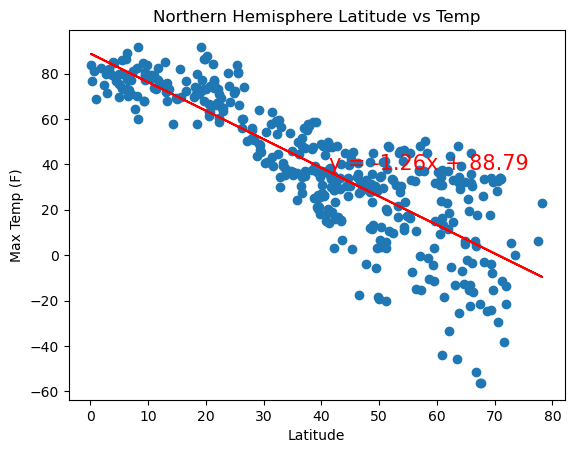

None


In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.ylabel("Max Temp (F)")
plt.title(f'Northern Hemisphere Latitude vs Temp')
print(linear_reg_plot(x_values,y_values,))

The r-squared is: 0.4538975979337999
y = 0.34x + 81.25


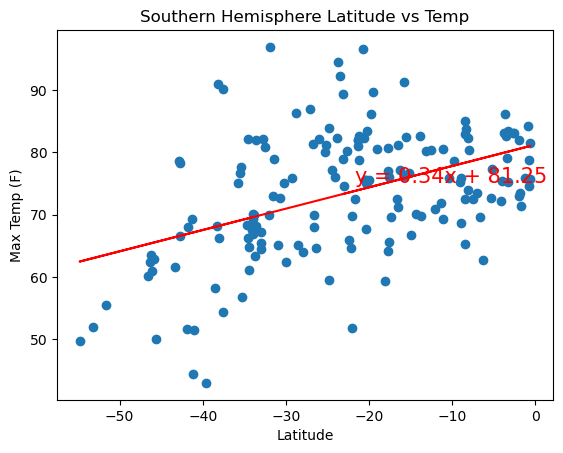

None


In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.ylabel("Max Temp (F)")
plt.title(f'Southern Hemisphere Latitude vs Temp')
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** 
The scatter plot maps Northern and Southern cities' temperature against their latitude. Cities selected randomly.

The result reveals a strong correlation between distance from the equator temperature. The closer to the equator, the higher the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.384500171694821
y = 0.43x + 56.7


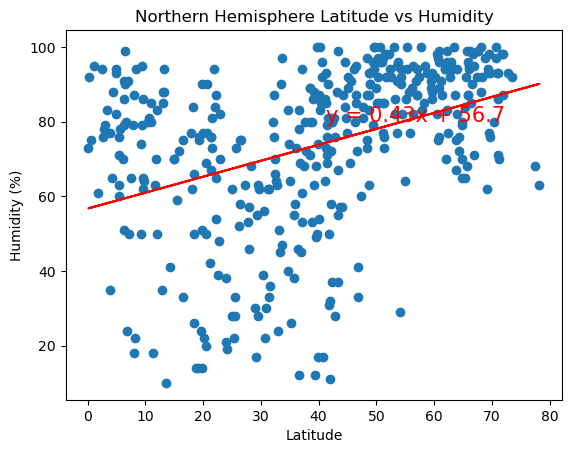

None


In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.ylabel("Humidity (%)")
plt.title(f'Northern Hemisphere Latitude vs Humidity')
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.444803076748836
y = 0.62x + 87.08


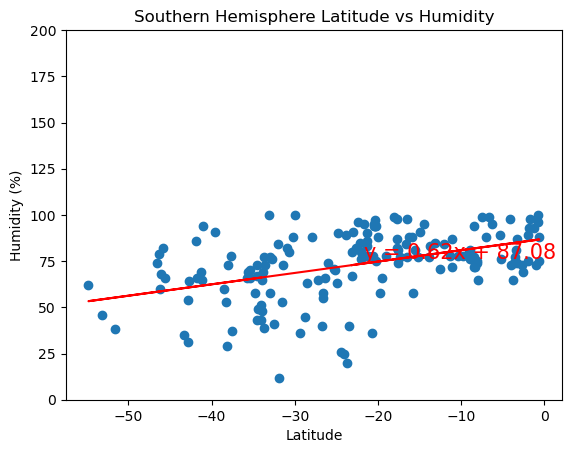

None


In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
plt.title(f'Southern Hemisphere Latitude vs Humidity')
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** 
The scatter plot maps Northern and Southern cities' humidity against their latitude. Cities selected randomly.

The result reveals no correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.3075099341465216
y = 0.64x + 32.19


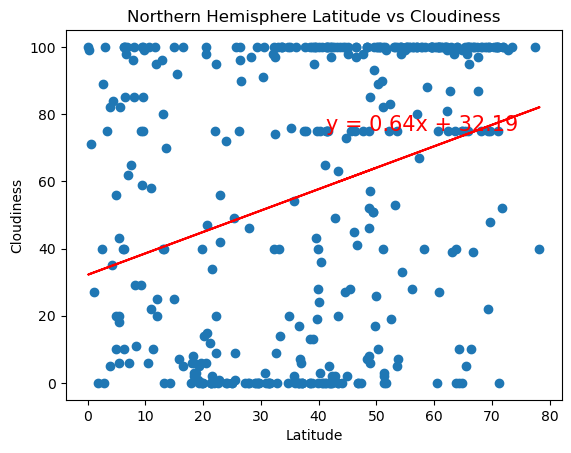

None


In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
plt.title(f'Northern Hemisphere Latitude vs Cloudiness')
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.36869426531694427
y = 1.15x + 80.71


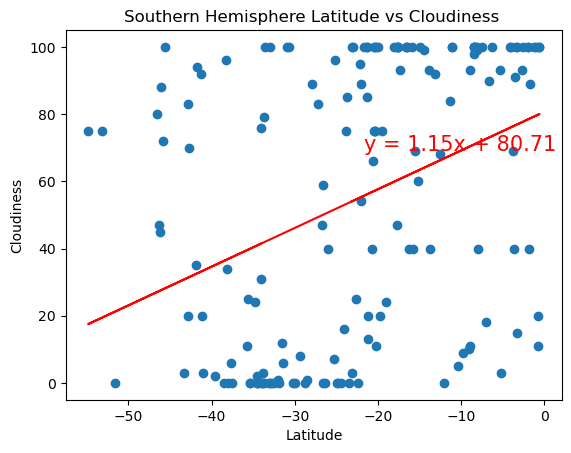

None


In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
plt.title(f'Southern Hemisphere Latitude vs Cloudiness ')
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** 
The scatter plot maps Northern and Southern cities' cloudiness against their latitude. Cities selected randomly.

The result reveals no correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.10939662929623659
y = 0.04x + 7.09


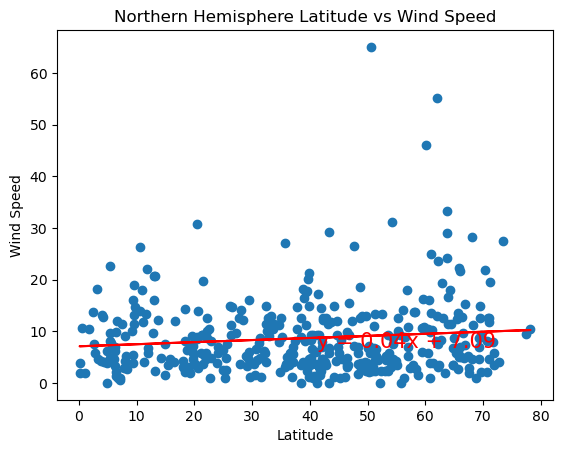

None


In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
plt.title(f'Northern Hemisphere Latitude vs Wind Speed')
print(linear_reg_plot(x_values,y_values))

The r-squared is: -0.3438724474353408
y = -0.14x + 4.57


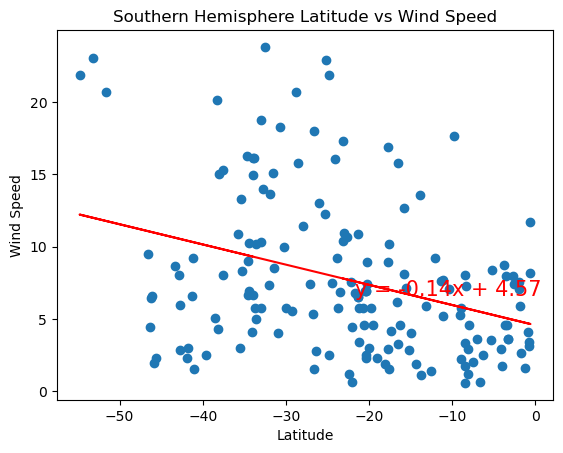

None


In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
plt.title(f'Southern Hemisphere Latitude vs Wind Speed')
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:**
The scatter plot maps Northern and Southern cities' wind speed against their latitude. Cities selected randomly.

The result reveals no correlation between latitude and wind speed.